# University of Tehran Signals and Systems Project
## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

### Imports

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed

%matplotlib inline
print('imports done')

imports done


### First, compute the camera calibration using chessboard images

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

...


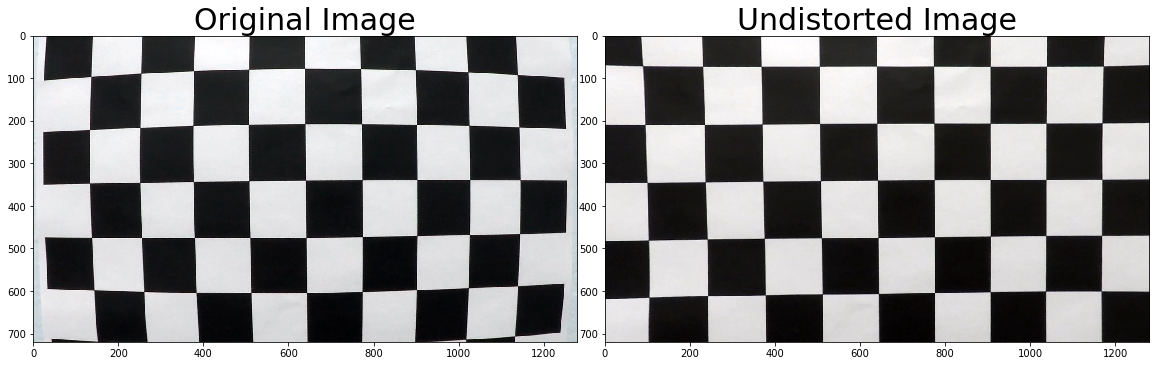

In [3]:
#Test undistortion on chessboard image
img = cv2.imread('./camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
print('...')


### Test on Image

...


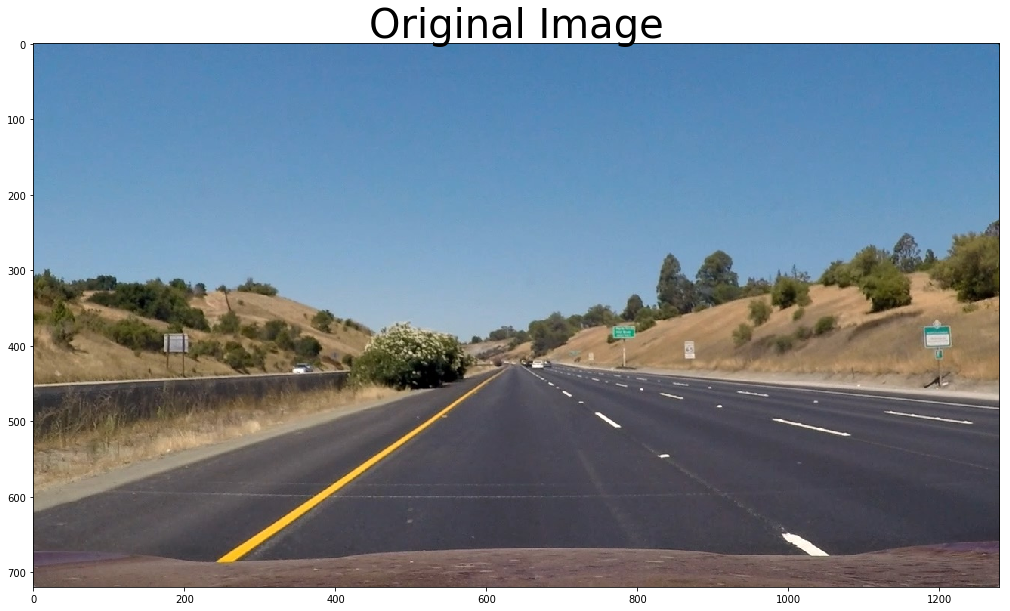

In [4]:
test_image = cv2.imread('./test_images/straight_lines1.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
f, plot1 = plt.subplots(1,1, figsize=(20,10))
plot1.imshow(test_image)
plot1.set_title('Original Image', fontsize=40)
print('...')

Visualize undistort on example image

...


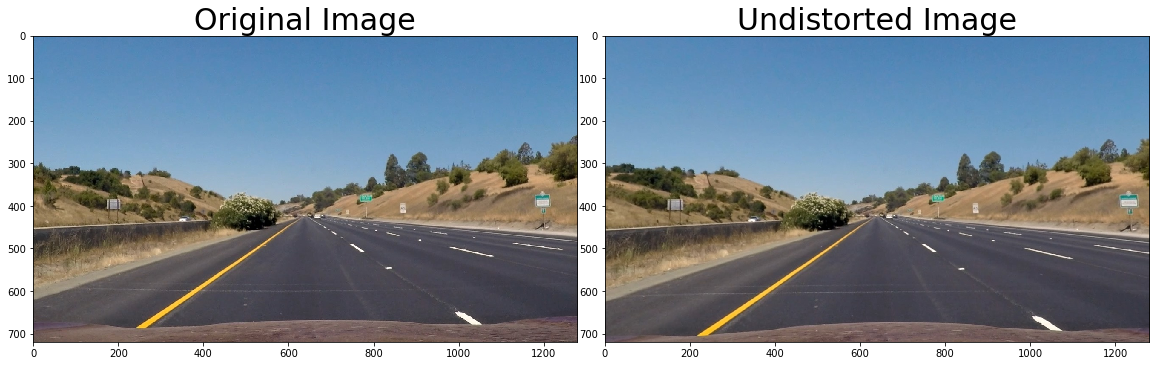

In [5]:
test_image_undistort = cv2.undistort(test_image, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(test_image_undistort)
ax2.set_title('Undistorted Image', fontsize=30)

print('...')

Pay attention the change in shape of the car hood

### Perspective Transform

...


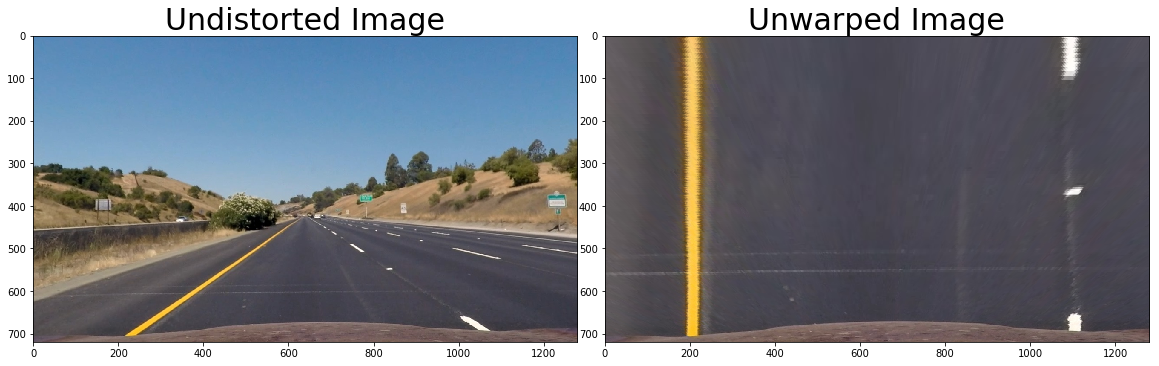

In [6]:
img_size = (test_image_undistort.shape[1], test_image_undistort.shape[0])

src_pts = np.float32([[220, 720],[1010,720],[530,500], [740,500]])
dst_pts = np.float32([[220, 720],[1010, 720], [220, 0], [1010, 0]])

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped_img = cv2.warpPerspective(test_image_undistort, M, img_size, flags=cv2.INTER_NEAREST)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(test_image_undistort)
ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(warped_img)
ax2.set_title('Unwarped Image', fontsize=30)

print('...')

#M_ = cv2.getPerspectiveTransform(dst_pts, src_pts)
#test_image = cv2.warpPerspective(warped, M_, img_size, flags=cv2.INTER_NEAREST)  # keep same size as input image
#cv2.imwrite('BirdEyeView__.png', test_image)
#plt.subplot(121),plt.imshow(test_image),plt.title('Output')
#plt.subplot(122),plt.imshow(warped),plt.title('Input')
#plt.show()

Selected Area on undistorted image

...


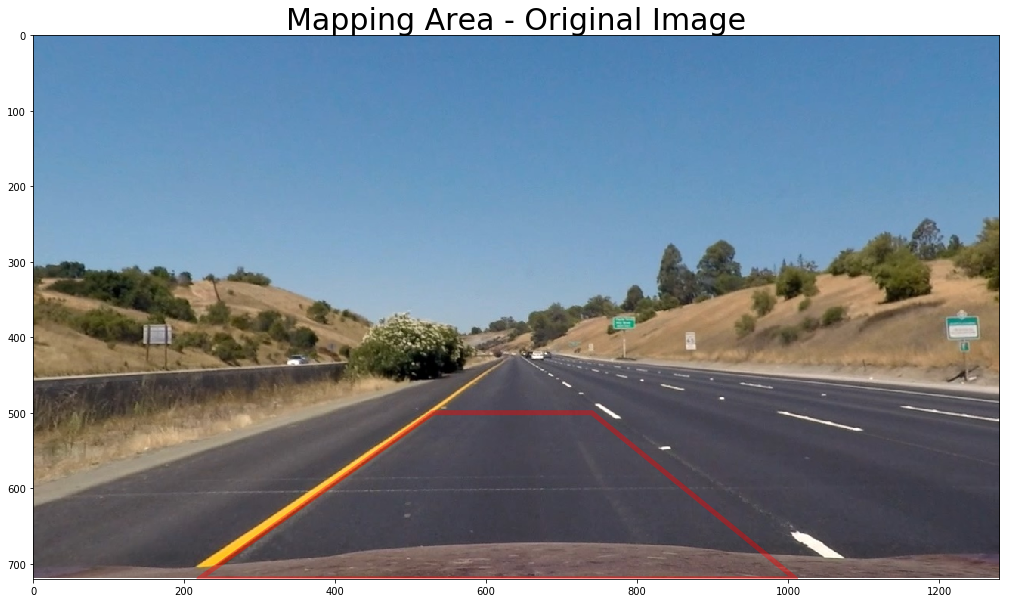

In [7]:
f, ax1 = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(test_image_undistort)
x = [src_pts[0][0],src_pts[2][0],src_pts[3][0],src_pts[1][0],src_pts[0][0]]
y = [src_pts[0][1],src_pts[2][1],src_pts[3][1],src_pts[1][1],src_pts[0][1]]
ax1.plot(x, y, color='#FF0000', alpha=0.4, linewidth=5, solid_capstyle='round', zorder=2)
ax1.set_ylim([img_size[1],0])
ax1.set_xlim([0,img_size[0]])
ax1.set_title('Mapping Area - Original Image', fontsize=30)
print('...')

### Sobel Transform

...


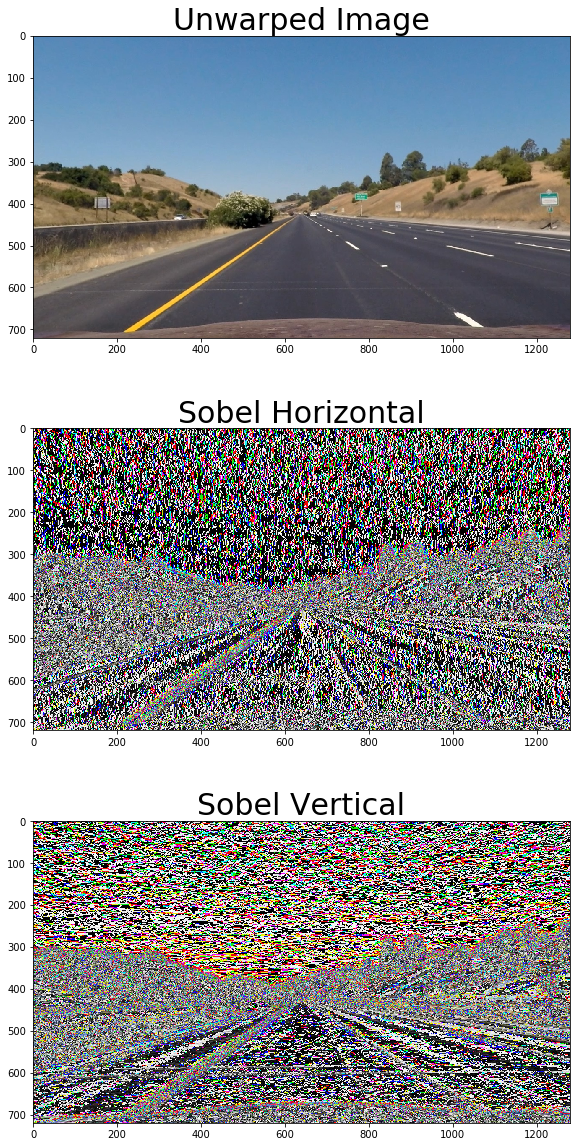

In [9]:
gray_img = cv2.cvtColor(warped_img,cv2.COLOR_BGR2RGB)
#rows, cols = gray_img.shape
sobel_horizontal = cv2.Sobel(test_image_undistort, cv2.CV_64F, 1, 0, ksize=0)
sobel_vertical = cv2.Sobel(test_image_undistort, cv2.CV_64F, 0, 1, ksize=-1)


f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40,20))
f.subplots_adjust(hspace = .3, wspace=.01)
ax1.imshow(test_image_undistort)
ax1.set_title('Unwarped Image', fontsize=30)
ax2.imshow(sobel_horizontal, cmap='gray')
ax2.set_title('Sobel Horizontal', fontsize=30)
ax3.imshow(sobel_vertical, cmap='gray')
ax3.set_title('Sobel Vertical', fontsize=30)

cv2.imwrite('./Sobel_Horizontal.png', sobel_horizontal)

print('...')

Play with values to get best threshold for sobel transform( I found this part of code form Internet but I know how it works)

In [10]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(img, orient='x', thresh_min=25, thresh_max=255):
    # Apply the following steps to img
    # 1) Convert to grayscale === or LAB L channel
    gray = (cv2.cvtColor(img, cv2.COLOR_RGB2Lab))[:,:,0]
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel = cv2.Sobel(gray, cv2.CV_64F, orient=='x', orient=='y')
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary # Remove this line
    return binary_output
print('...')


...


...


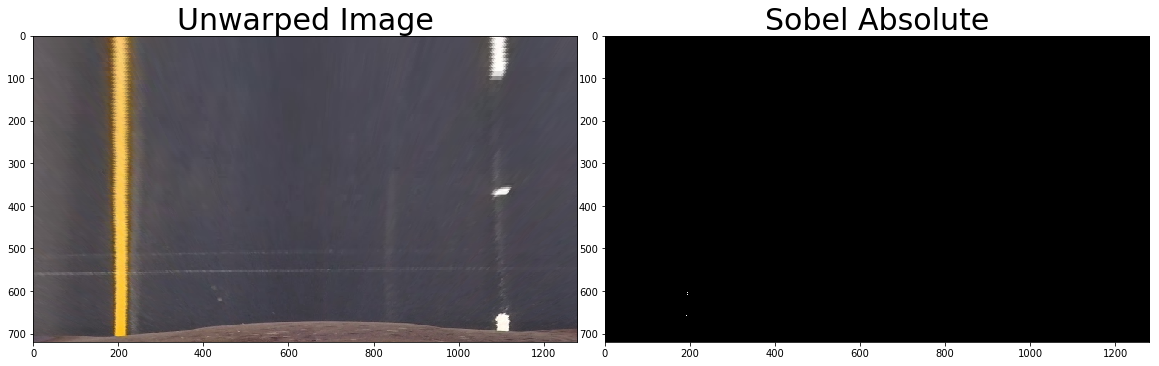

In [11]:
def update(min_thresh, max_thresh):
    exampleImg_sobelAbs = abs_sobel_thresh(warped_img, 'x', min_thresh, max_thresh)
    # Visualize sobel absolute threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(warped_img)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(exampleImg_sobelAbs, cmap='gray')
    ax2.set_title('Sobel Absolute', fontsize=30)

interact(update, 
         min_thresh=(0,255), 
         max_thresh=(0,255))

print('...')


...


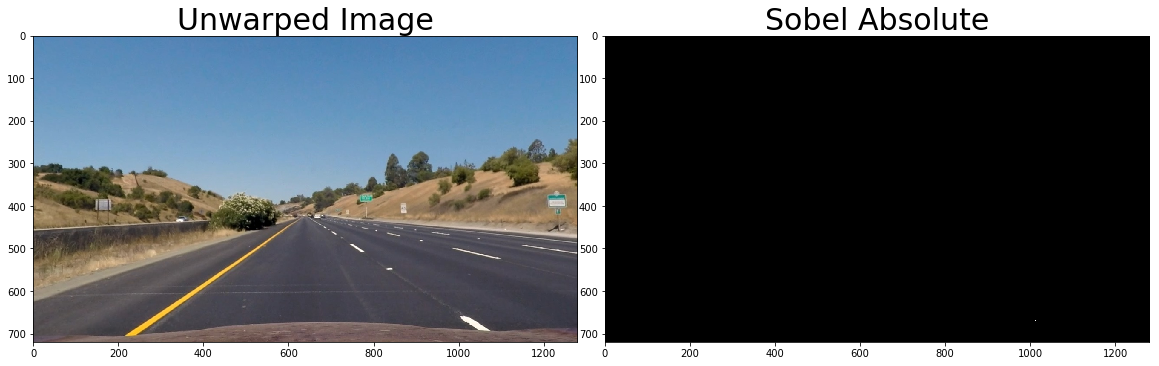

In [12]:
def update(min_thresh, max_thresh):
    Img_sobelAbs = abs_sobel_thresh(test_image_undistort, 'x', min_thresh, max_thresh)
    # Visualize sobel absolute threshold
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.subplots_adjust(hspace = .2, wspace=.05)
    ax1.imshow(test_image_undistort)
    ax1.set_title('Unwarped Image', fontsize=30)
    ax2.imshow(Img_sobelAbs, cmap='gray')
    ax2.set_title('Sobel Absolute', fontsize=30)

interact(update, 
         min_thresh=(0,255), 
         max_thresh=(0,255))

print('...')

I got min_thresh = 30 and max_thresh = 200 are best suited

### Color Filter
In this part I will show you how HSL and HSV color space affect on the image

...


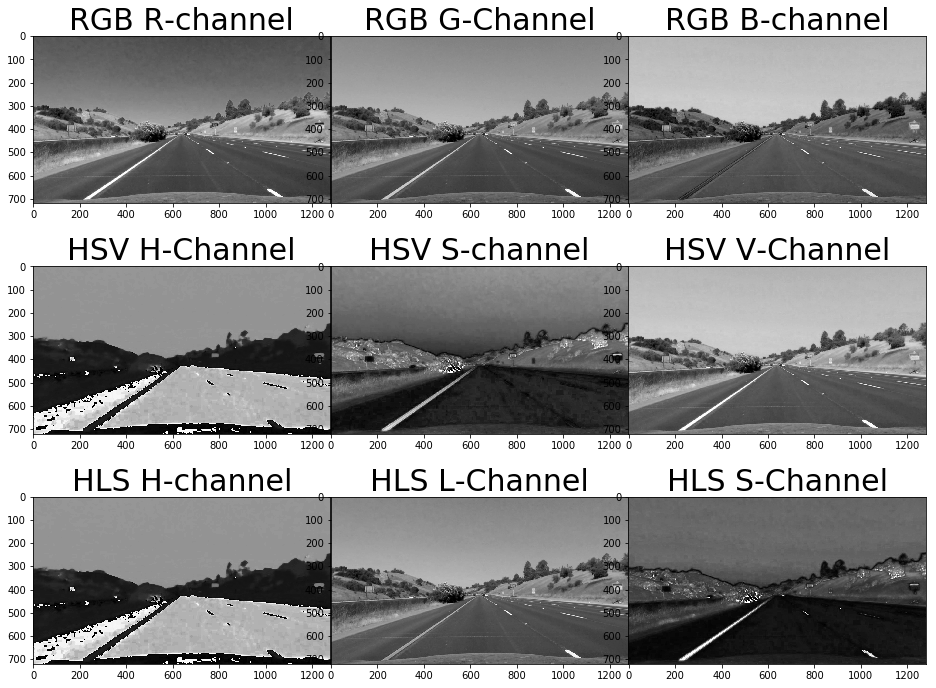

In [13]:
test_image_undistort_unwarp_R = test_image_undistort[:,:,0]
test_image_undistort_unwarp_G = test_image_undistort[:,:,1]
test_image_undistort_unwarp_B = test_image_undistort[:,:,2]
test_image_undistort_unwarp_HSV = cv2.cvtColor(test_image_undistort, cv2.COLOR_RGB2HSV)
test_image_undistort_unwarp_H = test_image_undistort_unwarp_HSV[:,:,0]
test_image_undistort_unwarp_S = test_image_undistort_unwarp_HSV[:,:,1]
test_image_undistort_unwarp_V = test_image_undistort_unwarp_HSV[:,:,2]
test_image_undistort_unwarp_HLS = cv2.cvtColor(test_image_undistort, cv2.COLOR_RGB2HLS)
test_image_undistort_unwarp_H_ = test_image_undistort_unwarp_HLS[:,:,0]
test_image_undistort_unwarp_L_ = test_image_undistort_unwarp_HLS[:,:,1]
test_image_undistort_unwarp_S_ = test_image_undistort_unwarp_HLS[:,:,2]
fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(test_image_undistort_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=30)
axs[1].imshow(test_image_undistort_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=30)
axs[2].imshow(test_image_undistort_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=30)
axs[3].imshow(test_image_undistort_unwarp_H, cmap='gray')
axs[3].set_title('HSV H-Channel', fontsize=30)
axs[4].imshow(test_image_undistort_unwarp_S, cmap='gray')
axs[4].set_title('HSV S-channel', fontsize=30)
axs[5].imshow(test_image_undistort_unwarp_V, cmap='gray')
axs[5].set_title('HSV V-Channel', fontsize=30)
axs[6].imshow(test_image_undistort_unwarp_H_, cmap='gray')
axs[6].set_title('HLS H-channel', fontsize=30)
axs[7].imshow(test_image_undistort_unwarp_L_, cmap='gray')
axs[7].set_title('HLS L-Channel', fontsize=30)
axs[8].imshow(test_image_undistort_unwarp_S_, cmap='gray')
axs[8].set_title('HLS S-Channel', fontsize=30)
print('...')

### Image Processing Pipeline

In [14]:
def undistort(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


def unwarp(img, src, dst):
    h,w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

def hls_lthresh(img, thresh=(220, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,1]
    hls_l = hls_l*(255/np.max(hls_l))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(hls_l)
    binary_output[(hls_l > thresh[0]) & (hls_l <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output

def lab_bthresh(img, thresh=(190,255)):
    # 1) Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    lab_b = lab[:,:,2]
    # don't normalize if there are no yellows in the image
    if np.max(lab_b) > 175:
        lab_b = lab_b*(255/np.max(lab_b))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(lab_b)
    binary_output[((lab_b > thresh[0]) & (lab_b <= thresh[1]))] = 1
    # 3) Return a binary image of threshold result
    return binary_output

In [15]:
def pipeline(img):
    # Undistort
    img_undistort = undistort(img)
    
    # Perspective Transform
    img_unwarp, M, Minv = unwarp(img_undistort, src, dst)

    # Sobel Absolute (using default parameters)
    #img_sobelAbs = abs_sobel_thresh(img_unwarp)

    # Sobel Magnitude (using default parameters)
    #img_sobelMag = mag_thresh(img_unwarp)
    
    # Sobel Direction (using default parameters)
    #img_sobelDir = dir_thresh(img_unwarp)
    
    # HLS S-channel Threshold (using default parameters)
    #img_SThresh = hls_sthresh(img_unwarp)

    # HLS L-channel Threshold (using default parameters)
    img_LThresh = hls_lthresh(img_unwarp)

    # Lab B-channel Threshold (using default parameters)
    img_BThresh = lab_bthresh(img_unwarp)
    
    # Combine HLS and Lab B channel thresholds
    combined = np.zeros_like(img_BThresh)
    combined[(img_LThresh == 1) | (img_BThresh == 1)] = 1
    return combined, Minv
    
print('...')

...


In [ ]:
images = glob.glob('./test_images/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
                  
i = 0
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bin, Minv = pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1

print('...')